# Quantum Phase Estimation: Long Form

This notebook demonstrates the Quantum Phase Estimation (QPE) algorithm using primitive gates. 

The implementation is the same as from PHYS440 Homework 3.
This is in contract to using the high-level Qiskit `PhaseEstimation` and `HamiltonianGate` classes.

In [ ]:
# Imports and initialization

import math
import numpy as np
from IPython.display import display, Markdown
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import QFT, StatePreparation

π = math.pi

# Eigenvectors of Z
z0 = np.array([0, 1])
z1 = np.array([1, 0])
# Eigenvectors of Y
y0 = np.array([1, -1j]) / np.sqrt(2)
y1 = np.array([1, 1j]) / np.sqrt(2)

# Sample circuit for $Z$

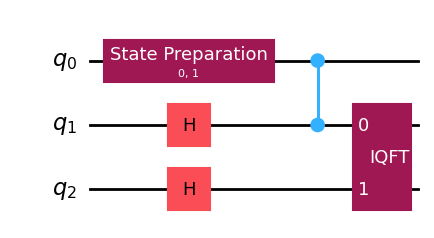

In [19]:
# Functions

def run_statevector(circuit):
    """Runs the circuit and returns the result as a statevector."""
    simulator = Aer.get_backend('statevector_simulator')
    aer_circuit = transpile(circuit, simulator)
    result_statevector = simulator.run(aer_circuit).result().get_statevector()
    return result_statevector

def markdown_statevector(sv):
    """Returns the statevector in markdown format."""
    return sv.draw('latex').data

def markdown_table_statevector(sv):
    """Returns the statevector in markdown format, with '|' replaced by '\|', for use in tables."""
    return markdown_statevector(sv).replace('|', r'\|')

def qpe_circuit(operator, eigenvector, apply_qpe=True):
    """Returns a circuit that prepares the eigenvector of the operator and applies the Quantum Phase Estimation algorithm."""
    n = 2
    input_qubit = 0
    qubits = QuantumRegister(n+1, "q")
    circuit = QuantumCircuit(qubits)
    circuit.append(StatePreparation(eigenvector), [0])
    if apply_qpe:
        for k in range(n):
            circuit.h(k+1)
        for k in range(n):
            if operator == 'Z':
                if n-k == 1: # Z^{2^{n-k-1}}==Z^1==Z for n-k==1, Z^k==I for k<n-1
                    circuit.cz(n-k, input_qubit)
            elif operator == 'Y':
                if n-k == 1: # Y^{2^{n-k-1}}==Y^1==Y for n-k==1, Y^k==I for k<n-1
                    circuit.cy(n-k, 0)
            else:
                raise ValueError(f"Unknown operator: {operator}")
        circuit.append(QFT(n).inverse(), qubits[1:])
    return circuit

def display_qpe_circuit(operator, eigenvector, title):
    """Displays the circuit that prepares the eigenvector of the operator and applies the Quantum Phase Estimation algorithm."""
    input_circuit = qpe_circuit(operator, eigenvector, apply_qpe=False)
    circuit = qpe_circuit(operator, eigenvector)
    display(Markdown(f"# {title}"))
    display(circuit.draw('mpl'))
    display(Markdown("Input state: " + markdown_statevector(run_statevector(input_circuit))))
    display(Markdown("Output state: " + markdown_statevector(run_statevector(circuit))))

# Show one example.
z_circuit = qpe_circuit('Z', z0)
display(Markdown("# Sample circuit for $Z$"))
display(z_circuit.draw('mpl'))

## Examples

Below are some examples, using the Z and Y operators. 
First we give a summary table showing the results of the QPE algorithm for each eigenvector of each operator.
Following that is a detailed version of each eigenvector for each operator, showing the circuit and the results.

In [20]:
data = [
    {'operator': 'Z', 'eigenvector': z0},
    {'operator': 'Z', 'eigenvector': z1},
    {'operator': 'Y', 'eigenvector': y0},
    {'operator': 'Y', 'eigenvector': y1},
]

table = "| Operator | Input statevector | Output statevector |\n"
table += "| --- | --- | --- |\n"
for d in data:
    operator = d['operator']
    eigenvector = d['eigenvector']
    input_statevector = markdown_table_statevector(run_statevector(qpe_circuit(operator, eigenvector, apply_qpe=False)))
    output_statevector = markdown_table_statevector(run_statevector(qpe_circuit(operator, eigenvector)))
    table += f"| ${operator}$ | {input_statevector} | {output_statevector} | \n"
display(Markdown("# Phase Estimation Examples (Long form circuit)"))
display(Markdown(table))

# Phase Estimation Examples (Long form circuit)

| Operator | Input statevector | Output statevector |
| --- | --- | --- |
| $Z$ | $$ \|001\rangle$$ | $$ \|101\rangle$$ | 
| $Z$ | $$ \|000\rangle$$ | $$ \|000\rangle$$ | 
| $Y$ | $$\frac{\sqrt{2}}{2} \|000\rangle- \frac{\sqrt{2} i}{2} \|001\rangle$$ | $$\frac{\sqrt{2}}{2} \|100\rangle- \frac{\sqrt{2} i}{2} \|101\rangle$$ | 
| $Y$ | $$\frac{\sqrt{2}}{2} \|000\rangle+\frac{\sqrt{2} i}{2} \|001\rangle$$ | $$\frac{\sqrt{2}}{2} \|000\rangle+\frac{\sqrt{2} i}{2} \|001\rangle$$ | 


# Z operator with eigenvector $z_0 = |1\rangle$, eigenvalue -1

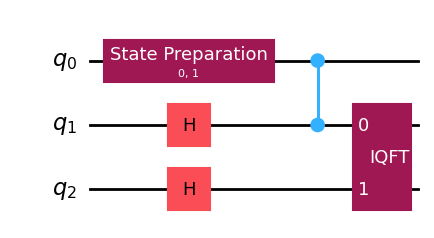

Input state: $$ |001\rangle$$

Output state: $$ |101\rangle$$

In [21]:
display_qpe_circuit('Z', z0, "Z operator with eigenvector $z_0 = |1\\rangle$, eigenvalue -1")

# Z operator with eigenvector $z_1 = |0\rangle$, eigenvalue +1

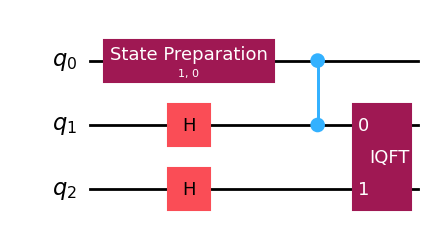

Input state: $$ |000\rangle$$

Output state: $$ |000\rangle$$

In [22]:
display_qpe_circuit('Z', z1, "Z operator with eigenvector $z_1 = |0\\rangle$, eigenvalue +1")

# Y operator with eigenvector $y_0 = \frac{1}{\sqrt{2}}(|0\rangle-i|1\rangle)$, eigenvalue -1

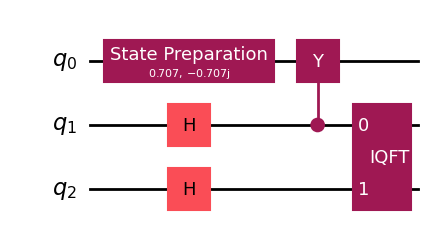

Input state: $$\frac{\sqrt{2}}{2} |000\rangle- \frac{\sqrt{2} i}{2} |001\rangle$$

Output state: $$\frac{\sqrt{2}}{2} |100\rangle- \frac{\sqrt{2} i}{2} |101\rangle$$

In [23]:
display_qpe_circuit('Y', y0, "Y operator with eigenvector $y_0 = \\frac{1}{\\sqrt{2}}(|0\\rangle-i|1\\rangle)$, eigenvalue -1")

# Y operator with eigenvector $y_1 = \frac{1}{\sqrt{2}}(|0\rangle+i|1\rangle)$, eigenvalue +1

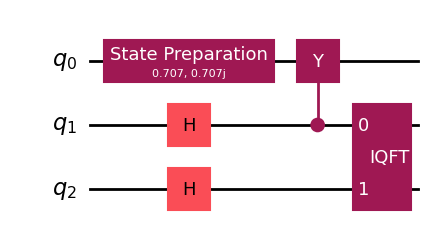

Input state: $$\frac{\sqrt{2}}{2} |000\rangle+\frac{\sqrt{2} i}{2} |001\rangle$$

Output state: $$\frac{\sqrt{2}}{2} |000\rangle+\frac{\sqrt{2} i}{2} |001\rangle$$

In [24]:
display_qpe_circuit('Y', y1, "Y operator with eigenvector $y_1 = \\frac{1}{\\sqrt{2}}(|0\\rangle+i|1\\rangle)$, eigenvalue +1")